# The task is divided on 2 part:
1.   ### compare how parameters like: *'country'*, *'professional'*, *'education'*, *IT skill* and *work experience* impact on salary,
2.   ### predict future salary for people whose salary value is unknown (missing). 

### Because schema has huge number of different kind of questions (and many of them are not connected with IT) not every columns will be using.

In [95]:
import pandas as pd
import numpy as np

### Open new CSV file as ***'df_answers'***  DataFrame

In [96]:
df_answers = pd.read_csv('survey_results_public_clean.csv', index_col = False)
df_answers.head()

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,CareerSatisfaction,JobSatisfaction,Gender,Race,DeveloperType,HaveWorkedLanguage,Currency,Salary
0,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,Male,White or of European descent,NaN,Swift,NaN,NaN
1,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,Male,White or of European descent,NaN,JavaScript; Python; Ruby; SQL,British pounds sterling (£),NaN
2,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,8.0,9.0,Male,White or of European descent,Other,Java; PHP; Python,British pounds sterling (£),113750.0
3,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",Non-profit/non-governmental organization or pr...,14 to 15 years,9 to 10 years,6.0,3.0,Male,White or of European descent,NaN,Matlab; Python; R; SQL,NaN,NaN
4,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,"Privately-held limited company, not in startup...",20 or more years,10 to 11 years,6.0,8.0,NaN,NaN,Mobile developer; Graphics programming; Deskto...,NaN,NaN,NaN


### Basic info about dataset

In [97]:
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        51392 non-null  object 
 1   ProgramHobby        51392 non-null  object 
 2   Country             51392 non-null  object 
 3   University          51392 non-null  object 
 4   EmploymentStatus    51392 non-null  object 
 5   FormalEducation     51392 non-null  object 
 6   MajorUndergrad      42841 non-null  object 
 7   HomeRemote          44008 non-null  object 
 8   CompanySize         38922 non-null  object 
 9   CompanyType         38823 non-null  object 
 10  YearsProgram        51145 non-null  object 
 11  YearsCodedJob       40890 non-null  object 
 12  CareerSatisfaction  42695 non-null  float64
 13  JobSatisfaction     40376 non-null  float64
 14  Gender              35047 non-null  object 
 15  Race                33033 non-null  object 
 16  Deve

***

### Let's check how many unique values are in every columns (exclude 'Salary')

In [98]:
import functools

def Dataframe_unique_values(df):
    '''
        Check number of unique values, their sum and total number of combinations in all columns.
        This give us some imagination of this dataset complexity.
    '''
    
    unique_val_list = []
    ## Exclude 'Salary' from inspection
    _ = df.drop('Salary', axis=1)
    print('Unique values in:\n')
    for val in _.columns:
        unique_num = len(_[val].unique())
        print(f"'{val}' column: {unique_num}")
        unique_val_list.append(unique_num)

    summary, multiply = sum(unique_val_list), functools.reduce(lambda x,y: x*y, unique_val_list)
    print(f'\nSum of all unique values are: {summary}')
    print(f'Number of all unique values combinations are {multiply} - it is more than 10**{np.log10(float(multiply)):.0f}')
    return summary, multiply

unique_values_before = Dataframe_unique_values(df_answers)

Unique values in:

'Professional' column: 5
'ProgramHobby' column: 4
'Country' column: 201
'University' column: 4
'EmploymentStatus' column: 7
'FormalEducation' column: 9
'MajorUndergrad' column: 17
'HomeRemote' column: 8
'CompanySize' column: 11
'CompanyType' column: 12
'YearsProgram' column: 22
'YearsCodedJob' column: 22
'CareerSatisfaction' column: 12
'JobSatisfaction' column: 12
'Gender' column: 30
'Race' column: 98
'DeveloperType' column: 1824
'HaveWorkedLanguage' column: 8439
'Currency' column: 18

Sum of all unique values are: 10755
Number of all unique values combinations are 1032483080631747751811481600 - it is more than 10**27


## We have got a big mess, so we must reduce the number of unique values as far as we can.

### Columns will be checking in the order below:


1.    'Country'
2.    'Professional', 'ProgramHobby', 'University', 'EmploymentStatus', 'FormalEducation'
1.    'MajorUndergrad', 'HomeRemote'
1.    'CompanySize', 'CompanyType'
1.    'YearsProgram', 'YearsCodedJob'
1.    'CareerSatisfaction', 'JobSatisfaction'
2.    'Gender'
2.    'Race'
2.    'DeveloperType'
2.    'HaveWorkedLanguage'
2.    'Currency'

### List of unique values in columns

In [99]:
def Unique_values_list(*cols):
    '''
        Listing first 25-th unique values (names and quantity) in every columns.
        It will give an orientation what kind of answers were given and in which direction
        should I go before I start cleaning my messy data.
    '''
    
    n = 25
    
    for i in list(cols):
        col_unique_names = df_answers[i].value_counts(dropna=False)
        unique_numbers = len(col_unique_names)
    
        if unique_numbers > n:
            print(f"Number of unique values in '{i}': {unique_numbers}\
            \n\nFirst {n} unique values:\n{col_unique_names[:n]}\n\n")
        else:
            print(f"Number of unique values in '{i}': {unique_numbers}\
            \n\nAll unique values:\n{col_unique_names}\n\n")

#### **1) 'Country'**

In [100]:
Unique_values_list('Country')

Number of unique values in 'Country': 201            

First 25 unique values:
United States         11455
India                  5197
United Kingdom         4395
Germany                4143
Canada                 2233
France                 1740
Poland                 1290
Australia               913
Russian Federation      873
Spain                   864
Netherlands             855
Italy                   781
Brazil                  777
Sweden                  611
Switzerland             595
Israel                  575
Romania                 561
Iran                    507
Austria                 477
Pakistan                454
Czech Republic          411
Belgium                 404
South Africa            380
Turkey                  363
Ukraine                 356
Name: Country, dtype: int64




#### Because many countries in this Series are probably the minority (small number of responders), I will take countries with at least 50 representants - that is the simplest method of detection and removing outliers.

In [101]:
countries_names = df_answers.groupby('Country').filter(lambda x: len(x) >= 50)['Country'].unique()

print(f"Number of the filtered countries: {len(countries_names)}\n")
print(f"Names of the filtered countries: \n{countries_names}")

Number of the filtered countries: 81

Names of the filtered countries: 
['United States' 'United Kingdom' 'Switzerland' 'New Zealand' 'Poland'
 'Colombia' 'France' 'Canada' 'Germany' 'Greece' 'Brazil' 'Israel' 'Italy'
 'Belgium' 'India' 'Chile' 'Croatia' 'Argentina' 'Netherlands' 'Denmark'
 'Ukraine' 'Sri Lanka' 'Malaysia' 'Finland' 'Turkey' 'Spain' 'Austria'
 'Mexico' 'Russian Federation' 'Bulgaria' 'Uruguay' 'Estonia' 'Iran'
 'Bangladesh' 'Sweden' 'Lithuania' 'Romania' 'Costa Rica' 'Serbia'
 'Slovenia' 'United Arab Emirates' 'Tunisia' 'Kenya' 'Norway'
 'Dominican Republic' 'Belarus' 'Portugal' 'Czech Republic' 'Albania'
 'I prefer not to say' 'South Africa' 'Moldavia' 'Ireland' 'Nepal'
 'Pakistan' 'Slovak Republic' 'Hungary' 'Egypt' 'Australia' 'Japan'
 'South Korea' 'Vietnam' 'Saudi Arabia' 'Macedonia' 'Bosnia-Herzegovina'
 'Indonesia' 'Nigeria' 'Peru' 'Morocco' 'Armenia' 'Lebanon' 'China'
 'Latvia' 'Singapore' 'Thailand' 'Philippines' 'Hong Kong' 'Taiwan'
 'Afghanistan' 'Ghana' 'Ve

#### 81 countries remained after making filtering (it is only 40% of total), but I can also remove 'I prefer not to say' value which is useless and that will be made in the next step.

In [102]:
df_answers = df_answers[(df_answers['Country'].isin(countries_names)) & 
                        (~df_answers['Country'].isin(['I prefer not to say']))].reset_index(drop=True)
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50048 entries, 0 to 50047
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        50048 non-null  object 
 1   ProgramHobby        50048 non-null  object 
 2   Country             50048 non-null  object 
 3   University          50048 non-null  object 
 4   EmploymentStatus    50048 non-null  object 
 5   FormalEducation     50048 non-null  object 
 6   MajorUndergrad      41807 non-null  object 
 7   HomeRemote          43004 non-null  object 
 8   CompanySize         38109 non-null  object 
 9   CompanyType         38015 non-null  object 
 10  YearsProgram        49825 non-null  object 
 11  YearsCodedJob       39961 non-null  object 
 12  CareerSatisfaction  41691 non-null  float64
 13  JobSatisfaction     39500 non-null  float64
 14  Gender              34324 non-null  object 
 15  Race                32380 non-null  object 
 16  Deve

#### **2) 'Professional', 'ProgramHobby', 'University', 'EmploymentStatus', 'FormalEducation'**

In [103]:
Unique_values_list('Professional')

Number of unique values in 'Professional': 5            

All unique values:
Professional developer                                  35368
Student                                                  7903
Professional non-developer who sometimes writes code     4955
Used to be a professional developer                       951
None of these                                             871
Name: Professional, dtype: int64




In [104]:
df_answers['Professional'] = df_answers['Professional'].replace('Used to be a professional developer', 'Professional developer')

In [105]:
Unique_values_list('ProgramHobby')

Number of unique values in 'ProgramHobby': 4            

All unique values:
Yes, I program as a hobby                    24193
Yes, both                                    13421
No                                            9505
Yes, I contribute to open source projects     2929
Name: ProgramHobby, dtype: int64




In [106]:
df_answers['ProgramHobby'] = df_answers['ProgramHobby'].replace(['Yes, both', 'Yes, I program as a hobby', 'Yes, I contribute to open source projects'], 'Yes')

In [107]:
Unique_values_list('University')

Number of unique values in 'University': 4            

All unique values:
No                     36742
Yes, full-time          9037
Yes, part-time          3218
I prefer not to say     1051
Name: University, dtype: int64




In [108]:
df_answers['University'] = df_answers['University'].replace('I prefer not to say', 'No')

In [109]:
Unique_values_list('EmploymentStatus')

Number of unique values in 'EmploymentStatus': 7            

All unique values:
Employed full-time                                      35399
Independent contractor, freelancer, or self-employed     5035
Employed part-time                                       3099
Not employed, and not looking for work                   2698
Not employed, but looking for work                       2672
I prefer not to say                                       994
Retired                                                   151
Name: EmploymentStatus, dtype: int64




In [110]:
df_answers['EmploymentStatus'] = df_answers['EmploymentStatus'].replace(['I prefer not to say', 'Retired'], 'Not employed, and not looking for work')

In [111]:
Unique_values_list('FormalEducation')

Number of unique values in 'FormalEducation': 9            

All unique values:
Bachelor's degree                                                    21031
Master's degree                                                      10939
Some college/university study without earning a bachelor's degree     7932
Secondary school                                                      5752
Doctoral degree                                                       1277
I prefer not to answer                                                1032
Primary/elementary school                                             1001
Professional degree                                                    686
I never completed any formal education                                 398
Name: FormalEducation, dtype: int64




In [112]:
df_answers['FormalEducation'] = df_answers['FormalEducation'].replace('I prefer not to answer', 'I never completed any formal education')
df_answers['FormalEducation'] = df_answers['FormalEducation'].replace("Some college/university study without earning a bachelor's degree", 'Secondary school')

#### How does it look like after modyfications?

In [113]:
Unique_values_list('Professional', 'ProgramHobby', 'University', 'EmploymentStatus', 'FormalEducation')

Number of unique values in 'Professional': 4            

All unique values:
Professional developer                                  36319
Student                                                  7903
Professional non-developer who sometimes writes code     4955
None of these                                             871
Name: Professional, dtype: int64


Number of unique values in 'ProgramHobby': 2            

All unique values:
Yes    40543
No      9505
Name: ProgramHobby, dtype: int64


Number of unique values in 'University': 3            

All unique values:
No                37793
Yes, full-time     9037
Yes, part-time     3218
Name: University, dtype: int64


Number of unique values in 'EmploymentStatus': 5            

All unique values:
Employed full-time                                      35399
Independent contractor, freelancer, or self-employed     5035
Not employed, and not looking for work                   3843
Employed part-time                                     

#### **3) 'MajorUndergrad', 'HomeRemote'**

In [114]:
Unique_values_list('MajorUndergrad')

Number of unique values in 'MajorUndergrad': 17            

All unique values:
Computer science or software engineering                        20875
NaN                                                              8241
Computer engineering or electrical/electronics engineering       4269
Computer programming or Web development                          3760
Information technology, networking, or system administration     2074
A natural science                                                1840
A non-computer-focused engineering discipline                    1762
Mathematics or statistics                                        1618
Something else                                                   1025
A humanities discipline                                           891
A business discipline                                             884
Fine arts or performing arts                                      639
Management information systems                                    630
A social s

#### Take all non-technical discipline into one list and replace it with ***'A humanities discipline'*** option. All missing values will be filled by ***'I never declared a major'***, because it probably means the same.

In [115]:
non_tech_list = ['A natural science', 'Fine arts or performing arts',
                 'A social science', 'Psychology', 'A health science']

df_answers['MajorUndergrad'] = df_answers['MajorUndergrad'].replace(non_tech_list, 'A humanities discipline')
df_answers['MajorUndergrad'] = df_answers['MajorUndergrad'].fillna('I never declared a major')

#### How does it look like after replacing?

In [116]:
Unique_values_list('MajorUndergrad')

Number of unique values in 'MajorUndergrad': 11            

All unique values:
Computer science or software engineering                        20875
I never declared a major                                         8821
A humanities discipline                                          4330
Computer engineering or electrical/electronics engineering       4269
Computer programming or Web development                          3760
Information technology, networking, or system administration     2074
A non-computer-focused engineering discipline                    1762
Mathematics or statistics                                        1618
Something else                                                   1025
A business discipline                                             884
Management information systems                                    630
Name: MajorUndergrad, dtype: int64




#### Great - no missing values and number of options decreased by 1/3...

In [117]:
Unique_values_list('HomeRemote')

Number of unique values in 'HomeRemote': 8            

All unique values:
A few days each month                                      15186
Never                                                      13706
NaN                                                         7044
All or almost all the time (I'm full-time remote)           4741
Less than half the time, but at least one day each week     4045
More than half, but not all, the time                       1822
It's complicated                                            1813
About half the time                                         1691
Name: HomeRemote, dtype: int64




In [118]:
df_answers['HomeRemote'] = df_answers['HomeRemote'].replace('Less than half the time, but at least one day each week', 'A few days each month')
df_answers['HomeRemote'] = df_answers['HomeRemote'].replace("It's complicated", 'About half the time')
df_answers['HomeRemote'] = df_answers['HomeRemote'].replace('More than half, but not all, the time', "All or almost all the time (I'm full-time remote)")

In [119]:
Unique_values_list('HomeRemote')

Number of unique values in 'HomeRemote': 5            

All unique values:
A few days each month                                19231
Never                                                13706
NaN                                                   7044
All or almost all the time (I'm full-time remote)     6563
About half the time                                   3504
Name: HomeRemote, dtype: int64




#### It looks fine, but what about missing values (14% of total answers)? There are 2 ways:
#### - distribute these values proportionally into the rest of answer using manually written function,
#### - check how many percent of total non-missing 'Salary' information will be lost when I remove all missing values from 'HomeRemote' column; acceptable upper limit is 5%

In [120]:
def Missing_values_multireplacement(col):
    '''
        Replace missing (NaN) values with strings from the same Series 
        based on their stats distribution.
        
        p: frequency of appearing unique values in column
    '''
    
    # Boolean mask
    missing = df_answers[col].isnull()
    # Counting unique values in columns and display them as decimal fractals
    col_stats = df_answers[col].value_counts(normalize=True)
    # Final replacing the missing data index by index
    df_answers.loc[missing, col] = np.random.choice(col_stats.index, size = len(df_answers[missing]), p = col_stats.values)

In [121]:
def Percent_of_data_lost(col):
    notnan_salary_before = df_answers['Salary'].notnull().sum()
    if type(col)==str:
        cond = df_answers[col].isnull()
    elif type(col)==list:
        ## Indexes of missing values in all columns at once
        cond = df_answers[col].isnull().all(axis=1)
    ind_list = df_answers[cond].index
    notnan_salary_after = df_answers.loc[ind_list, 'Salary'].notnull().sum()
    return print(f"{100*(notnan_salary_after / notnan_salary_before):.1f}% of useful data from 'Salary' column will be lost")

In [122]:
Percent_of_data_lost('HomeRemote')

0.1% of useful data from 'Salary' column will be lost


In [123]:
df_answers = df_answers.dropna(subset=['HomeRemote'], axis=0).reset_index(drop=True)
Unique_values_list('HomeRemote')

Number of unique values in 'HomeRemote': 4            

All unique values:
A few days each month                                19231
Never                                                13706
All or almost all the time (I'm full-time remote)     6563
About half the time                                   3504
Name: HomeRemote, dtype: int64




In [124]:
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43004 entries, 0 to 43003
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        43004 non-null  object 
 1   ProgramHobby        43004 non-null  object 
 2   Country             43004 non-null  object 
 3   University          43004 non-null  object 
 4   EmploymentStatus    43004 non-null  object 
 5   FormalEducation     43004 non-null  object 
 6   MajorUndergrad      43004 non-null  object 
 7   HomeRemote          43004 non-null  object 
 8   CompanySize         38060 non-null  object 
 9   CompanyType         37973 non-null  object 
 10  YearsProgram        42827 non-null  object 
 11  YearsCodedJob       38864 non-null  object 
 12  CareerSatisfaction  39524 non-null  float64
 13  JobSatisfaction     39452 non-null  float64
 14  Gender              30383 non-null  object 
 15  Race                28703 non-null  object 
 16  Deve

### **4) 'CompanySize', 'CompanyType'**

In [125]:
Unique_values_list('CompanySize', 'CompanyType')

Number of unique values in 'CompanySize': 11            

All unique values:
20 to 99 employees          8363
100 to 499 employees        7127
10,000 or more employees    5632
NaN                         4944
10 to 19 employees          3990
1,000 to 4,999 employees    3768
Fewer than 10 employees     3682
500 to 999 employees        2420
5,000 to 9,999 employees    1579
I don't know                 844
I prefer not to answer       655
Name: CompanySize, dtype: int64


Number of unique values in 'CompanyType': 12            

All unique values:
Privately-held limited company, not in startup mode                      16364
Publicly-traded corporation                                               5822
NaN                                                                       5031
I don't know                                                              3165
Sole proprietorship or partnership, not in startup mode                   2764
Venture-funded startup                                

### For both columns answers **"I don't know"** and **'I prefer not to answer'** will be treated as the missing data (they do not give me any useful information).
### All company size will be change into format ***'x to y employees'***

In [126]:
df_answers[['CompanySize', 'CompanyType']] = df_answers[['CompanySize', 'CompanyType']].replace(["I don't know", 'I prefer not to answer'], np.nan)
df_answers['CompanySize'] = df_answers['CompanySize'].replace('Fewer than 10 employees', '1 to 9 employees')

In [127]:
Unique_values_list('CompanySize', 'CompanyType')

Number of unique values in 'CompanySize': 9            

All unique values:
20 to 99 employees          8363
100 to 499 employees        7127
NaN                         6443
10,000 or more employees    5632
10 to 19 employees          3990
1,000 to 4,999 employees    3768
1 to 9 employees            3682
500 to 999 employees        2420
5,000 to 9,999 employees    1579
Name: CompanySize, dtype: int64


Number of unique values in 'CompanyType': 10            

All unique values:
Privately-held limited company, not in startup mode                      16364
NaN                                                                       9958
Publicly-traded corporation                                               5822
Sole proprietorship or partnership, not in startup mode                   2764
Venture-funded startup                                                    2356
Government agency or public school/university                             2347
Pre-series A startup                      

In [128]:
Percent_of_data_lost(['CompanySize', 'CompanyType'])

0.4% of useful data from 'Salary' column will be lost


### Once again after removing missing data from columns I will lost only less than 1% of useful values from 'Salary' column

In [129]:
df_answers = df_answers.dropna(subset=['CompanySize', 'CompanyType']).reset_index(drop=True)

In [130]:
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32187 entries, 0 to 32186
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        32187 non-null  object 
 1   ProgramHobby        32187 non-null  object 
 2   Country             32187 non-null  object 
 3   University          32187 non-null  object 
 4   EmploymentStatus    32187 non-null  object 
 5   FormalEducation     32187 non-null  object 
 6   MajorUndergrad      32187 non-null  object 
 7   HomeRemote          32187 non-null  object 
 8   CompanySize         32187 non-null  object 
 9   CompanyType         32187 non-null  object 
 10  YearsProgram        32110 non-null  object 
 11  YearsCodedJob       29857 non-null  object 
 12  CareerSatisfaction  30340 non-null  float64
 13  JobSatisfaction     30305 non-null  float64
 14  Gender              23306 non-null  object 
 15  Race                22093 non-null  object 
 16  Deve

In [131]:
Unique_values_list('CompanySize', 'CompanyType')

Number of unique values in 'CompanySize': 8            

All unique values:
20 to 99 employees          7305
100 to 499 employees        6232
10,000 or more employees    5145
10 to 19 employees          3406
1,000 to 4,999 employees    3399
1 to 9 employees            3156
500 to 999 employees        2130
5,000 to 9,999 employees    1414
Name: CompanySize, dtype: int64


Number of unique values in 'CompanyType': 9            

All unique values:
Privately-held limited company, not in startup mode                      16105
Publicly-traded corporation                                               5655
Sole proprietorship or partnership, not in startup mode                   2729
Venture-funded startup                                                    2345
Government agency or public school/university                             2076
Pre-series A startup                                                      1242
Non-profit/non-governmental organization or private school/university     11

### **5) 'YearsProgram', 'YearsCodedJob'**

In [133]:
Unique_values_list('YearsProgram', 'YearsCodedJob')

Number of unique values in 'YearsProgram': 22            

All unique values:
20 or more years    6297
9 to 10 years       2195
5 to 6 years        2116
4 to 5 years        2111
3 to 4 years        1854
6 to 7 years        1762
7 to 8 years        1609
2 to 3 years        1534
10 to 11 years      1526
14 to 15 years      1507
8 to 9 years        1279
15 to 16 years      1254
1 to 2 years        1121
11 to 12 years       989
12 to 13 years       950
13 to 14 years       817
16 to 17 years       788
19 to 20 years       754
17 to 18 years       648
Less than a year     525
18 to 19 years       474
NaN                   77
Name: YearsProgram, dtype: int64


Number of unique values in 'YearsCodedJob': 22            

All unique values:
1 to 2 years        3693
2 to 3 years        3488
3 to 4 years        2959
4 to 5 years        2522
NaN                 2330
5 to 6 years        2231
20 or more years    2131
Less than a year    2021
6 to 7 years        1455
9 to 10 years       1445
10 to 11

### There are no many missing values in this column, so I decide to delete these rows using dropna() method.

In [134]:
df_answers = df_answers.dropna(how='all', subset=['YearsProgram']).reset_index(drop=True)
df_answers['YearsProgram'] = df_answers['YearsProgram'].replace('Less than a year', '0 to 1 year')

Unique_values_list('YearsProgram')

Number of unique values in 'YearsProgram': 21            

All unique values:
20 or more years    6297
9 to 10 years       2195
5 to 6 years        2116
4 to 5 years        2111
3 to 4 years        1854
6 to 7 years        1762
7 to 8 years        1609
2 to 3 years        1534
10 to 11 years      1526
14 to 15 years      1507
8 to 9 years        1279
15 to 16 years      1254
1 to 2 years        1121
11 to 12 years       989
12 to 13 years       950
13 to 14 years       817
16 to 17 years       788
19 to 20 years       754
17 to 18 years       648
0 to 1 year          525
18 to 19 years       474
Name: YearsProgram, dtype: int64




### I will distribute NaN (missing values) into the rest of the options by their percent proportions to all the column data and change 'Less than a year' into '0 to 1 year'

In [135]:
df_answers['YearsCodedJob'] = df_answers['YearsCodedJob'].replace('Less than a year', '0 to 1 year')

Missing_values_multireplacement('YearsCodedJob')

Unique_values_list('YearsCodedJob')

Number of unique values in 'YearsCodedJob': 21            

All unique values:
1 to 2 years        3974
2 to 3 years        3718
3 to 4 years        3188
4 to 5 years        2740
5 to 6 years        2406
20 or more years    2285
0 to 1 year         2185
9 to 10 years       1561
6 to 7 years        1551
10 to 11 years      1369
7 to 8 years        1343
8 to 9 years        1051
11 to 12 years       690
15 to 16 years       677
14 to 15 years       647
12 to 13 years       617
16 to 17 years       574
17 to 18 years       445
13 to 14 years       420
19 to 20 years       344
18 to 19 years       325
Name: YearsCodedJob, dtype: int64




### **6) 'CareerSatisfaction', 'JobSatisfaction'**

In [136]:
Unique_values_list('CareerSatisfaction', 'JobSatisfaction')

Number of unique values in 'CareerSatisfaction': 12            

All unique values:
8.0     8132
7.0     6895
9.0     4145
10.0    3631
6.0     3315
5.0     2035
NaN     1820
4.0      900
3.0      672
2.0      295
0.0      170
1.0      100
Name: CareerSatisfaction, dtype: int64


Number of unique values in 'JobSatisfaction': 12            

All unique values:
8.0     6793
7.0     6077
9.0     4203
6.0     3582
10.0    2822
5.0     2756
NaN     1855
4.0     1453
3.0     1250
2.0      703
0.0      334
1.0      282
Name: JobSatisfaction, dtype: int64




### Missing position (answer) means 'no satisfaction', so it will be replace by 0

In [137]:
df_answers[['CareerSatisfaction', 'JobSatisfaction']] = df_answers[['CareerSatisfaction', 'JobSatisfaction']].replace(np.nan, 0)

Unique_values_list('CareerSatisfaction', 'JobSatisfaction')

Number of unique values in 'CareerSatisfaction': 11            

All unique values:
8.0     8132
7.0     6895
9.0     4145
10.0    3631
6.0     3315
5.0     2035
0.0     1990
4.0      900
3.0      672
2.0      295
1.0      100
Name: CareerSatisfaction, dtype: int64


Number of unique values in 'JobSatisfaction': 11            

All unique values:
8.0     6793
7.0     6077
9.0     4203
6.0     3582
10.0    2822
5.0     2756
0.0     2189
4.0     1453
3.0     1250
2.0      703
1.0      282
Name: JobSatisfaction, dtype: int64




### **7) 'Gender'**

In [138]:
Unique_values_list('Gender')

Number of unique values in 'Gender': 27            

First 25 unique values:
Male                                                       21122
NaN                                                         8818
Female                                                      1711
Other                                                        106
Male; Other                                                   96
Gender non-conforming                                         89
Male; Gender non-conforming                                   41
Transgender                                                   27
Female; Transgender                                           27
Female; Gender non-conforming                                 20
Male; Female                                                  11
Transgender; Gender non-conforming                            10
Male; Female; Transgender; Gender non-conforming; Other        8
Female; Transgender; Gender non-conforming                     5
Male; Female;

### Reduce groups number into three ('Male', 'Female', NaN) and then replace NaN values 
### with 'Male' and 'Female' using *Missing_values_multireplacement()* function

In [139]:
df_answers['Gender'] = np.where(df_answers['Gender'].isin(['Male', 'Female']), df_answers['Gender'], np.NaN)

Missing_values_multireplacement('Gender')

In [140]:
df_answers['Gender'].describe()

count     32110
unique        2
top        Male
freq      29732
Name: Gender, dtype: object

### **8) 'Race'**

In [141]:
Unique_values_list('Race')

Number of unique values in 'Race': 73            

First 25 unique values:
White or of European descent                                                                                              16340
NaN                                                                                                                       10030
South Asian                                                                                                                1750
East Asian                                                                                                                  800
Hispanic or Latino/Latina                                                                                                   758
Middle Eastern                                                                                                              494
I prefer not to say                                                                                                         435
Black or of African descent  

### I must reduce huge list of different answers - there are many phrase repetitions in the strings and it could be a good idea to reduce number of answers using some Regex pattern/-s

In [142]:
main_race_names = ['Black or of African descent', 'East Asian', 'Hispanic or Latino/Latina', 'Middle Eastern', 'South Asian',
                   'Native American, Pacific Islander, or Indigenous Australian', 'White or of European descent']

d = {}
for i in main_race_names:
    replace_string = str('^'+ i +'[\s\S]*')
    replace_string
    d.update({replace_string:i})
    
df_answers['Race'] = df_answers['Race'].replace(d, regex=True)

In [143]:
Unique_values_list('Race')

Number of unique values in 'Race': 11            

All unique values:
White or of European descent                                   16372
NaN                                                            10030
South Asian                                                     1780
Hispanic or Latino/Latina                                       1066
East Asian                                                       978
Middle Eastern                                                   628
I prefer not to say                                              435
Black or of African descent                                      408
I don’t know                                                     267
Native American, Pacific Islander, or Indigenous Australian      137
I don’t know; I prefer not to say                                  9
Name: Race, dtype: int64




### Almost perfect, but what to do with the answers: **'I don’t know'**, **'I prefer not to say'**, **'I don’t know; I prefer not to say'**?

### These sentences do not give us any extra informations, so at the first step we replace them with NaN value
### and then we will use **`Missing_values_multireplacement()`** function.

### It also simplify future regression task, because we will have less, but more useful races description.

In [144]:
cols_to_remove = ['I don’t know', 'I prefer not to say', 'I don’t know; I prefer not to say']
df_answers['Race'] = np.where(~df_answers['Race'].isin(cols_to_remove), df_answers['Race'], np.NaN)

Missing_values_multireplacement('Race')

Unique_values_list('Race')

Number of unique values in 'Race': 7            

All unique values:
White or of European descent                                   24635
South Asian                                                     2677
Hispanic or Latino/Latina                                       1621
East Asian                                                      1431
Middle Eastern                                                   934
Black or of African descent                                      616
Native American, Pacific Islander, or Indigenous Australian      196
Name: Race, dtype: int64




### **9) 'DeveloperType'**

In [145]:
Unique_values_list('DeveloperType')

Number of unique values in 'DeveloperType': 1450            

First 25 unique values:
Web developer                                                                                           8009
NaN                                                                                                     5562
Web developer; Desktop applications developer                                                           1390
Mobile developer                                                                                        1153
Desktop applications developer                                                                          1082
Web developer; Mobile developer                                                                         1045
Other                                                                                                    919
Web developer; DevOps specialist                                                                         571
Web developer; Mobile developer; Desktop a

### I get 1450 unique values after making our filtered dataset!! If my model should be usable, I need to limit answers to about 50-100 positions.

In [146]:
df_answers['DeveloperType'] = df_answers['DeveloperType']\
.replace(np.nan, '')\
.map(lambda x: '; '.join(x.split('; ')[:2]) if len(x.split('; ')) > 2 else x)\
.replace('', np.nan)

In [147]:
Unique_values_list('DeveloperType')

Number of unique values in 'DeveloperType': 100            

First 25 unique values:
Web developer                                                                            8009
NaN                                                                                      5562
Web developer; Mobile developer                                                          3806
Web developer; Desktop applications developer                                            2262
Mobile developer                                                                         1153
Desktop applications developer                                                           1082
Web developer; Developer with a statistics or mathematics background                      977
Other                                                                                     919
Web developer; Database administrator                                                     918
Web developer; DevOps specialist                                     

### We see sometimes **'; Other'** description at the end of the strings - let's remove them and simplify our group of unique values in this column

In [148]:
df_answers['DeveloperType'] = df_answers['DeveloperType'].replace(np.nan, '')\
.map(lambda x: x.split('; Other')[0]).replace('', np.nan)

Unique_values_list('DeveloperType')

Number of unique values in 'DeveloperType': 88            

First 25 unique values:
Web developer                                                                            8228
NaN                                                                                      5562
Web developer; Mobile developer                                                          3806
Web developer; Desktop applications developer                                            2262
Mobile developer                                                                         1176
Desktop applications developer                                                           1145
Web developer; Developer with a statistics or mathematics background                      977
Other                                                                                     919
Web developer; Database administrator                                                     918
Web developer; DevOps specialist                                      

In [149]:
df_answers['DeveloperType'] = df_answers['DeveloperType'].replace('Other', np.nan)
df_answers['DeveloperType'] = df_answers['DeveloperType'].replace(regex=r'Developer with a statistics or mathematics background',
                                                                  value='Data scientist')

Missing_values_multireplacement('DeveloperType')

developer_types = df_answers.groupby('DeveloperType').filter(lambda x: len(x) >= 5)['DeveloperType'].unique()

print(f"Final number of the filtered developer types: {len(developer_types)}\n")
print(f"All names of the filtered developer types: \n{developer_types}")

Final number of the filtered developer types: 61

All names of the filtered developer types: 
['Web developer; Mobile developer' 'Web developer'
 'Web developer; Desktop applications developer'
 'Mobile developer; Graphics programming' 'Web developer; Data scientist'
 'Embedded applications/devices developer'
 'Web developer; Embedded applications/devices developer' 'Data scientist'
 'Web developer; Graphic designer'
 'Mobile developer; Embedded applications/devices developer'
 'Mobile developer' 'Desktop applications developer'
 'Web developer; Systems administrator'
 'Web developer; Database administrator' 'DevOps specialist'
 'Mobile developer; Desktop applications developer'
 'Data scientist; Desktop applications developer'
 'Web developer; DevOps specialist'
 'Machine learning specialist; Data scientist'
 'Web developer; Graphics programming'
 'Web developer; Machine learning specialist' 'Database administrator'
 'Graphics programming; Data scientist'
 'Systems administrator; Qual

### After making many transformations we achieved our goal - there are 61 **'developer type'** only (and that is 61/1450=4% of initial number of the groups).
### Now we take into consideration our filter (*developer_types* variable) and make cleaning of our DataFrame.

In [150]:
df_answers = df_answers[df_answers['DeveloperType'].isin(developer_types)].reset_index(drop=True)
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32083 entries, 0 to 32082
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        32083 non-null  object 
 1   ProgramHobby        32083 non-null  object 
 2   Country             32083 non-null  object 
 3   University          32083 non-null  object 
 4   EmploymentStatus    32083 non-null  object 
 5   FormalEducation     32083 non-null  object 
 6   MajorUndergrad      32083 non-null  object 
 7   HomeRemote          32083 non-null  object 
 8   CompanySize         32083 non-null  object 
 9   CompanyType         32083 non-null  object 
 10  YearsProgram        32083 non-null  object 
 11  YearsCodedJob       32083 non-null  object 
 12  CareerSatisfaction  32083 non-null  float64
 13  JobSatisfaction     32083 non-null  float64
 14  Gender              32083 non-null  object 
 15  Race                32083 non-null  object 
 16  Deve

### Everything till now looks fine and only last 2 columns must be checked: **'HaveWorkedLanguage'** and **'Currency'**

### **10) 'HaveWorkedLanguage'**

In [151]:
Unique_values_list('HaveWorkedLanguage')

Number of unique values in 'HaveWorkedLanguage': 6029            

First 25 unique values:
NaN                                7800
C#; JavaScript; SQL                1003
JavaScript; PHP; SQL                760
Java                                597
JavaScript                          522
Java; JavaScript; SQL               490
JavaScript; PHP                     434
Java; JavaScript                    418
C#                                  381
C#; JavaScript                      370
C#; SQL                             367
C#; JavaScript; SQL; TypeScript     310
Python                              303
Java; SQL                           259
JavaScript; Python                  250
Java; JavaScript; PHP; SQL          202
C#; JavaScript; PHP; SQL            181
C#; Java; JavaScript; SQL           170
C++                                 159
JavaScript; PHP; Python; SQL        158
C#; JavaScript; SQL; VB.NET         150
SQL                                 147
JavaScript; Python; SQL      

### The most popular programming languages from PYPL Index https://pypl.github.io/PYPL.html
### 'Python', 'Java', 'JavaScript', 'C#', 'C', 'C++', 'C/C++', 'PHP', 'R', 'TypeScript', 'Objective-C', 'Swift', 'Kotlin', 'Matlab', 'VBA', 'Go', 'Rust', 'Ruby', 'Visual Basic', 'Ada', 'Scala', 'Dart', 'Lua', 'Abap', 'PERL', 'Julia', 'Groovy', 'Cobol' 'Delphi/Pascal', 'Delphi', 'Pascal', 'Haskell' 

### My additional choice (excluded in PYPL Index) are 'SQL' and 'VB.NET'

In [154]:
## Full list of the most popular programming languages

IT_languages = ['Python', 'Java', 'JavaScript', 'C#', 'C', 'C++', 'C/C++', 'PHP',
                'R', 'TypeScript', 'Objective-C', 'Swift', 'Kotlin', 'Matlab', 'VBA',
                'Go', 'Rust', 'Ruby', 'Visual Basic', 'Ada', 'Scala', 'Dart', 'Lua',
                'Abap', 'PERL', 'Julia', 'Groovy', 'Cobol', 'Delphi/Pascal', 'Delphi',
                'Pascal', 'Haskell', 'SQL', 'VB.NET']

### Because people have tendency to write as many programming languages as they know (or thought they know),
### I will limit every answer to only 2 first options (languages).

### It will looks like `['main language', 'secondary language']` list where:
#### - `'main language'` (used in everyday work)
#### - `'secondary language'` (as a complementary to `'main language'`)

In [155]:
df_answers['HaveWorkedLanguage'] = df_answers['HaveWorkedLanguage'].replace(np.nan, None)\
.map(lambda x: '; '.join(x.split('; ')[:2]) if len(x.split('; ')) > 2 else x)

Unique_values_list('HaveWorkedLanguage')

Number of unique values in 'HaveWorkedLanguage': 357            

First 25 unique values:
C#; JavaScript              4242
Java; JavaScript            3257
C; C++                      2557
JavaScript; PHP             2443
C#; Java                    1666
C++; C#                     1200
Assembly; C                  987
Java                         801
JavaScript; Python           768
JavaScript                   695
C#; SQL                      693
C++; Java                    593
Groovy; Java                 517
C#                           503
C; C#                        426
Python                       420
C; Java                      419
Java; SQL                    361
Java; Python                 352
C++; JavaScript              306
JavaScript; Ruby             299
CoffeeScript; JavaScript     298
Go; JavaScript               231
C++; Python                  225
JavaScript; SQL              223
Name: HaveWorkedLanguage, dtype: int64




### Not bad (17 times less values!!), but now we will use our list of the most popular programming languages (PYPL Index) to get much lower number of unique values.

In [156]:
def IT_languages_filter(x):
    filtered_lists = [list1 for list1 in x.split('; ')[:2] if list1.lower() in (y.lower() for y in IT_languages)]
    return (', ').join(filtered_lists)

df_answers['HaveWorkedLanguage'] = df_answers['HaveWorkedLanguage'].map(lambda x: IT_languages_filter(x))

In [157]:
Unique_values_list('HaveWorkedLanguage')

Number of unique values in 'HaveWorkedLanguage': 227            

First 25 unique values:
C#, JavaScript        4242
Java, JavaScript      3257
C, C++                2557
JavaScript, PHP       2443
C#, Java              1666
C++, C#               1200
JavaScript            1179
C                     1160
C#                    1088
Java                  1083
JavaScript, Python     768
C#, SQL                693
C++, Java              593
Groovy, Java           517
Python                 457
C++                    432
C, C#                  426
C, Java                419
Java, SQL              361
Java, Python           352
C++, JavaScript        306
JavaScript, Ruby       299
Go, JavaScript         231
C++, Python            225
JavaScript, SQL        223
Name: HaveWorkedLanguage, dtype: int64




In [158]:
IT_language_types = df_answers.groupby('HaveWorkedLanguage').filter(lambda x: len(x) >= 5)['HaveWorkedLanguage'].unique()

print(f"Final number of the filtered IT language types: {len(IT_language_types)}\n")
print(f"All names of the filtered IT language types: \n{IT_language_types}")

Final number of the filtered IT language types: 158

All names of the filtered IT language types: 
['JavaScript, Python' 'Java, PHP' 'Matlab, Python' '' 'C#, JavaScript'
 'R, SQL' 'Java, JavaScript' 'C' 'Perl, Python' 'Java' 'Java, Scala' 'C#'
 'C#, Java' 'C, C++' 'C++, C#' 'JavaScript, Ruby' 'JavaScript' 'C++'
 'Go, Java' 'JavaScript, PHP' 'Java, SQL' 'JavaScript, Scala'
 'C, JavaScript' 'C, Go' 'Python' 'Java, VB.NET' 'C, C#' 'C#, Go'
 'C, Python' 'VB.NET' 'C#, SQL' 'C++, Java' 'Ruby' 'SQL' 'Go, JavaScript'
 'C#, Objective-C' 'JavaScript, TypeScript' 'Objective-C, Swift'
 'Groovy, Java' 'C, Java' 'C++, Matlab' 'Java, Lua' 'JavaScript, SQL'
 'C++, Python' 'Objective-C, Python' 'Scala' 'Java, Matlab'
 'C++, JavaScript' 'C++, Objective-C' 'Go, Python' 'Swift' 'Haskell'
 'JavaScript, Perl' 'C#, Python' 'Groovy, PHP' 'Go' 'PHP' 'SQL, VB.NET'
 'Python, SQL' 'Java, TypeScript' 'Java, Python' 'PHP, Python' 'C++, Perl'
 'C++, Swift' 'C++, Groovy' 'Objective-C, Ruby' 'C#, R' 'Groovy'
 'Objecti

#### Final result is awesome - 158 combinations from about 6000 at the beginning (type of answers were limited to 2%).
#### Now we take into consideration our filter (*IT_language_types* variable) and make cleaning of our DataFrame once again.

In [159]:
df_answers = df_answers[df_answers['HaveWorkedLanguage'].isin(IT_language_types)].reset_index(drop=True)
df_answers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31942 entries, 0 to 31941
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        31942 non-null  object 
 1   ProgramHobby        31942 non-null  object 
 2   Country             31942 non-null  object 
 3   University          31942 non-null  object 
 4   EmploymentStatus    31942 non-null  object 
 5   FormalEducation     31942 non-null  object 
 6   MajorUndergrad      31942 non-null  object 
 7   HomeRemote          31942 non-null  object 
 8   CompanySize         31942 non-null  object 
 9   CompanyType         31942 non-null  object 
 10  YearsProgram        31942 non-null  object 
 11  YearsCodedJob       31942 non-null  object 
 12  CareerSatisfaction  31942 non-null  float64
 13  JobSatisfaction     31942 non-null  float64
 14  Gender              31942 non-null  object 
 15  Race                31942 non-null  object 
 16  Deve

### **11) 'Currency'**

In [160]:
Unique_values_list('Currency')

Number of unique values in 'Currency': 18            

All unique values:
NaN                            15953
U.S. dollars ($)                5497
Euros (€)                       4235
British pounds sterling (£)     1725
Indian rupees (?)               1490
Canadian dollars (C$)            786
Polish zloty (zl)                393
Australian dollars (A$)          366
Brazilian reais (R$)             269
Russian rubles (?)               264
Swiss francs                     242
Swedish kroner (SEK)             234
South African rands (R)          139
Mexican pesos (MXN$)             101
Japanese yen (¥)                  94
Chinese yuan renminbi (¥)         78
Singapore dollars (S$)            48
Bitcoin (btc)                     28
Name: Currency, dtype: int64




### This is very (probably - the most) important column for our future modelling.
#### 1) Replace Bitcoin values with 'np.nan' (Bitcoin is not formal currency in the world, besides its market value can change dramatically in short period of time - there is no reference point)
#### 2) Currencies in every country have different 'impact' on human life and I think that the best method is probably making recalculation from all the currencies to USD (excluding USD). After this we will round the results to 2 decimals point.
#### 3) Remove 'Currency' column which was added temporary to recalculate currencies.

In [161]:
df_answers = df_answers[~df_answers['Currency'].isin(['Bitcoin (btc)'])].reset_index(drop=True)

Unique_values_list('Currency')

Number of unique values in 'Currency': 17            

All unique values:
NaN                            15953
U.S. dollars ($)                5497
Euros (€)                       4235
British pounds sterling (£)     1725
Indian rupees (?)               1490
Canadian dollars (C$)            786
Polish zloty (zl)                393
Australian dollars (A$)          366
Brazilian reais (R$)             269
Russian rubles (?)               264
Swiss francs                     242
Swedish kroner (SEK)             234
South African rands (R)          139
Mexican pesos (MXN$)             101
Japanese yen (¥)                  94
Chinese yuan renminbi (¥)         78
Singapore dollars (S$)            48
Name: Currency, dtype: int64




In [162]:
def Filter_and_replace(col, str_repl):
    '''
        Filling missing position in 'Currency' column with the rest of the currencies
    '''
    
    filter_1 = df_answers['Country'].isin(col)
    filter_2 = df_answers['Currency'].isna()
    
    _ = df_answers[filter_1 & filter_2].index.tolist()
    df_answers['Currency'] = np.where(df_answers['Currency'].index.isin(_), str_repl, df_answers['Currency'])
    
    return df_answers['Currency']

In [163]:
euro_currency_countries = ['Ireland', 'Estonia', 'Slovenia', 'Portugal',
                           'Finland', 'Italy', 'Belgium', 'Macedonia', 'Germany', 
                           'Netherlands', 'Spain', 'Latvia', 'Austria',
                           'France', 'Lithuania', 'Greece', 'Slovak Republic']

Filter_and_replace(euro_currency_countries, 'Euros (€)')

Unique_values_list('Currency')

Number of unique values in 'Currency': 17            

All unique values:
NaN                            12758
Euros (€)                       7430
U.S. dollars ($)                5497
British pounds sterling (£)     1725
Indian rupees (?)               1490
Canadian dollars (C$)            786
Polish zloty (zl)                393
Australian dollars (A$)          366
Brazilian reais (R$)             269
Russian rubles (?)               264
Swiss francs                     242
Swedish kroner (SEK)             234
South African rands (R)          139
Mexican pesos (MXN$)             101
Japanese yen (¥)                  94
Chinese yuan renminbi (¥)         78
Singapore dollars (S$)            48
Name: Currency, dtype: int64




### Filling missing position in 'Currency' column with the rest of the currencies (in the order presented in the 2 lists below)

In [164]:
non_euro_currency_countries = ['United Kingdom', 'Canada', 'United States', 'Brazil', 'India',
                               'Poland', 'Sweden', 'Russian Federation', 'Switzerland', 'Japan',
                               'Australia', 'Mexico', 'China', 'Singapore', 'South Africa']

non_euro_currencies = ['British pounds sterling (£)', 'Canadian dollars (C$)',
                       'U.S. dollars ($)', 'Brazilian reais (R$)', 'Indian rupees (?)', 
                       'Polish zloty (zl)', 'Swedish kroner (SEK)', 'Russian rubles (?)',
                       'Swiss francs', 'Japanese yen (¥)', 'Australian dollars (A$)', 
                       'Mexican pesos (MXN$)', 'Chinese yuan renminbi (¥)', 
                       'Singapore dollars (S$)', 'South African rands (R)']

for x,y in zip(non_euro_currency_countries, non_euro_currencies):
    Filter_and_replace([x], y)

Unique_values_list('Currency')

Number of unique values in 'Currency': 17            

All unique values:
U.S. dollars ($)               8831
Euros (€)                      7430
NaN                            4139
Indian rupees (?)              3162
British pounds sterling (£)    2915
Canadian dollars (C$)          1419
Polish zloty (zl)               706
Australian dollars (A$)         599
Russian rubles (?)              498
Brazilian reais (R$)            480
Swiss francs                    427
Swedish kroner (SEK)            403
South African rands (R)         276
Mexican pesos (MXN$)            199
Japanese yen (¥)                178
Chinese yuan renminbi (¥)       144
Singapore dollars (S$)          108
Name: Currency, dtype: int64




### Remove symbols of currency from their names

In [165]:
df_answers['Currency'] = df_answers['Currency'].replace(regex=r'\s[^a-z]+$', value='')
df_answers['Currency'] = df_answers['Currency'].replace('Polish zloty (zl)', 'Polish zloty')

Unique_values_list('Currency')

Number of unique values in 'Currency': 17            

All unique values:
U.S. dollars               8831
Euros                      7430
NaN                        4139
Indian rupees              3162
British pounds sterling    2915
Canadian dollars           1419
Polish zloty                706
Australian dollars          599
Russian rubles              498
Brazilian reais             480
Swiss francs                427
Swedish kroner              403
South African rands         276
Mexican pesos               199
Japanese yen                178
Chinese yuan renminbi       144
Singapore dollars           108
Name: Currency, dtype: int64




### We have got about 4100 missing values in 'Currency' column - there is no doubt that it is better than 28000 at the beginning, but let's try build function which give us answer for the question:
### **"How many non-missing data from 'Salary' column we will lost if we delete all missing values from 'Currency' column"?**

In [166]:
Percent_of_data_lost('Currency')

6.7% of useful data from 'Salary' column will be lost


### Not bad, but let's try harder - our temporary target for now is less than 3%.

In [167]:
countries_with_USD_payments = list(set(df_answers['Country']) ^ (set(non_euro_currency_countries).union(set(euro_currency_countries))))
countries_with_USD_payments

['Denmark',
 'Taiwan',
 'Hungary',
 'Egypt',
 'Argentina',
 'Malaysia',
 'Albania',
 'Venezuela',
 'Thailand',
 'Dominican Republic',
 'Tunisia',
 'Ukraine',
 'United Arab Emirates',
 'Norway',
 'Turkey',
 'Belarus',
 'Croatia',
 'Romania',
 'Bulgaria',
 'Lebanon',
 'Ghana',
 'Czech Republic',
 'Sri Lanka',
 'South Korea',
 'Costa Rica',
 'Israel',
 'Colombia',
 'Peru',
 'Hong Kong',
 'Saudi Arabia',
 'Nigeria',
 'Indonesia',
 'Moldavia',
 'Bangladesh',
 'Pakistan',
 'Nepal',
 'Armenia',
 'Bosnia-Herzegovina',
 'Serbia',
 'New Zealand',
 'Morocco',
 'Philippines',
 'Afghanistan',
 'Iran',
 'Uruguay',
 'Vietnam',
 'Chile',
 'Kenya']

In [168]:
Filter_and_replace(countries_with_USD_payments, 'U.S. dollars')

Unique_values_list('Currency')

Number of unique values in 'Currency': 16            

All unique values:
U.S. dollars               12970
Euros                       7430
Indian rupees               3162
British pounds sterling     2915
Canadian dollars            1419
Polish zloty                 706
Australian dollars           599
Russian rubles               498
Brazilian reais              480
Swiss francs                 427
Swedish kroner               403
South African rands          276
Mexican pesos                199
Japanese yen                 178
Chinese yuan renminbi        144
Singapore dollars            108
Name: Currency, dtype: int64




In [169]:
## Change currency name into USD/currency symbols
currencies_dict = {
    'Euros': 'usdeur',
    'Indian rupees': 'usdinr',
    'British pounds sterling': 'usdgbp',
    'Canadian dollars': 'usdcad',
    'Polish zloty': 'usdpln',
    'Australian dollars': 'usdaud',
    'Russian rubles': 'usdrub',
    'Brazilian reais': 'usdbrl',
    'Swedish kroner': 'usdsek',
    'Swiss francs': 'usdchf',
    'South African rands': 'usdzar',
    'Mexican pesos': 'usdmxn',
    'Japanese yen': 'usdjpy',
    'Chinese yuan renminbi': 'usdcny',
    'Singapore dollars': 'usdsgd'
}

def URL_to_webscrapping(currency):
    ## Make a url which including symbol from dictionary above 
    ## and date range for later webscraping Investment Fund prices
    symbol = currencies_dict[currency]
    return f'https://stooq.com/q/d/l/?s={symbol}&c=0&d1=20170101&d2=20171231'

In [170]:
pd.read_csv(URL_to_webscrapping('Euros')).head(10)

,Date,Open,High,Low,Close
0,2017-01-02,0.95095,0.95688,0.94998,0.95574
1,2017-01-03,0.95574,0.96704,0.95326,0.96066
2,2017-01-04,0.96066,0.96248,0.95244,0.95351
3,2017-01-05,0.95355,0.95411,0.94206,0.94321
4,2017-01-06,0.94318,0.95011,0.94224,0.94925
5,2017-01-09,0.94936,0.95138,0.94439,0.94479
6,2017-01-10,0.94472,0.94778,0.94102,0.94718
7,2017-01-11,0.94744,0.95651,0.94142,0.94483
8,2017-01-12,0.94484,0.94591,0.93593,0.94223
9,2017-01-13,0.94221,0.94365,0.93686,0.94006


In [171]:
def mean_values_of_currencies(currency):
    url_name = URL_to_webscrapping(currency)
    _ = pd.read_csv(url_name, usecols=['Date', 'Close'])
    # I am interested in average(mean) which is calculated for closing prices in 2017 year
    return round(_['Close'].mean(), 4)

mean_values_of_currencies('Euros')  ## example of Euros currency value

0.887

In [172]:
avg_prices = {key: mean_values_of_currencies(key) for key in currencies_dict}
avg_prices

{'Euros': 0.887,
 'Indian rupees': 65.1121,
 'British pounds sterling': 0.7767,
 'Canadian dollars': 1.2984,
 'Polish zloty': 3.7761,
 'Australian dollars': 1.3049,
 'Russian rubles': 58.3532,
 'Brazilian reais': 3.1922,
 'Swedish kroner': 8.5437,
 'Swiss francs': 0.9844,
 'South African rands': 13.2991,
 'Mexican pesos': 18.9125,
 'Japanese yen': 112.1426,
 'Chinese yuan renminbi': 6.7509,
 'Singapore dollars': 1.3804}

### Conversion of all currencies values into USD

In [173]:
def currencies_symbol_to_price(df):
    df = df.replace(to_replace=avg_prices.keys(), value=avg_prices.values())
    df = df.replace(to_replace='U.S. dollars', value=1)
    return df

df_answers['Salary_correction'] = (currencies_symbol_to_price(df_answers['Currency'])*df_answers['Salary']).round(2)
df_answers[['Salary_correction', 'Salary']].describe()

,Salary_correction,Salary
count,1.139300e+04,11393.000000
mean,1.461058e+05,57894.007476
std,4.702600e+05,40308.196474
min,0.000000e+00,0.000000
25%,3.433548e+04,27790.322581
50%,6.199462e+04,51612.903226
75%,1.072226e+05,82000.000000
max,1.948104e+07,197000.000000


### Limit upper salary to reasonable value of 250k USD/year gross in 2017 year

In [174]:
def reasonable_salaries_range(df):
    _ = df[~(df['Salary_correction'] > 250000)]
    _ = _.drop(['Currency'], axis=1).reset_index(drop=True)    
    return _

final_df = reasonable_salaries_range(df_answers)

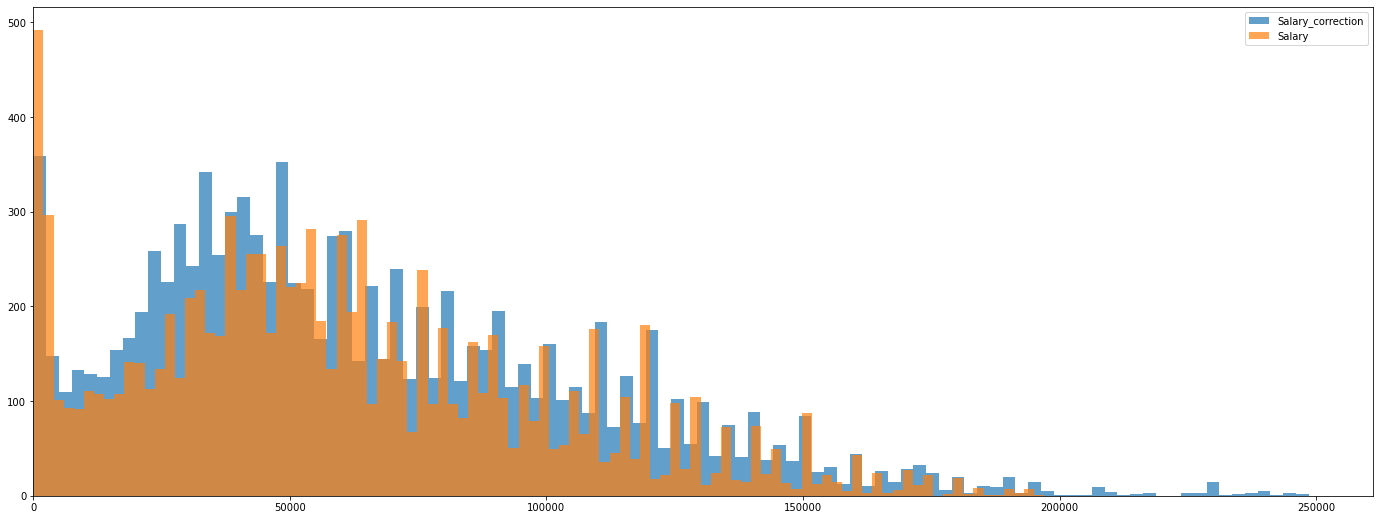

In [175]:
import matplotlib.pyplot as plt

plt.figure(figsize=(24, 9))

final_df['Salary_correction'].hist(bins=100, alpha=0.7, legend='after')
final_df['Salary'].hist(bins=100, alpha=0.7, legend='before')
plt.xlim(left=0)
plt.grid(None)
plt.show()

In [176]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30938 entries, 0 to 30937
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        30938 non-null  object 
 1   ProgramHobby        30938 non-null  object 
 2   Country             30938 non-null  object 
 3   University          30938 non-null  object 
 4   EmploymentStatus    30938 non-null  object 
 5   FormalEducation     30938 non-null  object 
 6   MajorUndergrad      30938 non-null  object 
 7   HomeRemote          30938 non-null  object 
 8   CompanySize         30938 non-null  object 
 9   CompanyType         30938 non-null  object 
 10  YearsProgram        30938 non-null  object 
 11  YearsCodedJob       30938 non-null  object 
 12  CareerSatisfaction  30938 non-null  float64
 13  JobSatisfaction     30938 non-null  float64
 14  Gender              30938 non-null  object 
 15  Race                30938 non-null  object 
 16  Deve

### Now after making changes with 'Salary' column I can delete it and change 'Salary_correction' column into 'Salary'

In [177]:
final_df = final_df.drop(['Salary'], axis=1).rename(columns={'Salary_correction': 'Salary'})

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30938 entries, 0 to 30937
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        30938 non-null  object 
 1   ProgramHobby        30938 non-null  object 
 2   Country             30938 non-null  object 
 3   University          30938 non-null  object 
 4   EmploymentStatus    30938 non-null  object 
 5   FormalEducation     30938 non-null  object 
 6   MajorUndergrad      30938 non-null  object 
 7   HomeRemote          30938 non-null  object 
 8   CompanySize         30938 non-null  object 
 9   CompanyType         30938 non-null  object 
 10  YearsProgram        30938 non-null  object 
 11  YearsCodedJob       30938 non-null  object 
 12  CareerSatisfaction  30938 non-null  float64
 13  JobSatisfaction     30938 non-null  float64
 14  Gender              30938 non-null  object 
 15  Race                30938 non-null  object 
 16  Deve

### Check if there are any empty string to remove in final Dataframe

In [178]:
print(final_df[final_df[final_df.columns] == ''].count())

Professional            0
ProgramHobby            0
Country                 0
University              0
EmploymentStatus        0
FormalEducation         0
MajorUndergrad          0
HomeRemote              0
CompanySize             0
CompanyType             0
YearsProgram            0
YearsCodedJob           0
CareerSatisfaction      0
JobSatisfaction         0
Gender                  0
Race                    0
DeveloperType           0
HaveWorkedLanguage    192
Salary                  0
dtype: int64


In [179]:
final_df = final_df[final_df['HaveWorkedLanguage'] != ''].reset_index(drop=True)

## Cleaning job is done - there is only final check of our dataset condition

In [180]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30746 entries, 0 to 30745
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Professional        30746 non-null  object 
 1   ProgramHobby        30746 non-null  object 
 2   Country             30746 non-null  object 
 3   University          30746 non-null  object 
 4   EmploymentStatus    30746 non-null  object 
 5   FormalEducation     30746 non-null  object 
 6   MajorUndergrad      30746 non-null  object 
 7   HomeRemote          30746 non-null  object 
 8   CompanySize         30746 non-null  object 
 9   CompanyType         30746 non-null  object 
 10  YearsProgram        30746 non-null  object 
 11  YearsCodedJob       30746 non-null  object 
 12  CareerSatisfaction  30746 non-null  float64
 13  JobSatisfaction     30746 non-null  float64
 14  Gender              30746 non-null  object 
 15  Race                30746 non-null  object 
 16  Deve

### Now it is perfect!

### Before we save result into new CSV file, take a look how different is our final dataset when we compare it with dataset before making data analysis.

In [181]:
def data_cleaning_efficiency_comparison():
    ## Dataframe unique values combination before cleaning
    multiply_1 = unique_values_before[1]
    ## Dataframe unique values combination after cleaning
    unique_values_after = Dataframe_unique_values(final_df)
    multiply_2 = unique_values_after[1]
    print('\n')
    
    return print(f'There are {(multiply_1 / multiply_2):.0f} times less unique data in the final DataFrame!!')

data_cleaning_efficiency_comparison()

Unique values in:

'Professional' column: 3
'ProgramHobby' column: 2
'Country' column: 80
'University' column: 3
'EmploymentStatus' column: 3
'FormalEducation' column: 7
'MajorUndergrad' column: 11
'HomeRemote' column: 4
'CompanySize' column: 8
'CompanyType' column: 9
'YearsProgram' column: 21
'YearsCodedJob' column: 21
'CareerSatisfaction' column: 11
'JobSatisfaction' column: 11
'Gender' column: 2
'Race' column: 7
'DeveloperType' column: 61
'HaveWorkedLanguage' column: 157

Sum of all unique values are: 421
Number of all unique values combinations are 685406853387970560 - it is more than 10**18


There are 1506379861 times less unique data in the final DataFrame!!


### Save Dataframe into CSV file

In [171]:
final_df.to_csv('cleaned_df.csv', index = False)